# DATA 601 PROJECT
## pop health 3

                                                                                           File created by :Nisha Budhathoki                                                                                    


#### PART-2
##### If there were chnages in all-cause mortality, Can we link excess deaths  to  COVID-19 either directly or indirectly ? 

## Statistical analysis 

In [1]:
library(tidyverse)
library(glmnet)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8



In [2]:
df = read.csv("20to22_merged_final.csv")
head(df)

,country,countrycode,year,total_deaths,covid_deaths,expected_deaths,excess_deaths,population,land_area,Ratio.of.Excess.death.to.COVID.19.deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare
,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Australia,AUS,2022,190326,14438,168414.04,21911.965,25978935,7682300,1.5,175888,55.57580,84.34512,65099.846,16.6,86,3,72.5
2,Austria,AUT,2022,91582,4689,81758.12,9823.883,9052856,82409,2.1,86893,51.79581,108.51695,52084.681,19.4,59,110,66.8
3,Belgium,BEL,2022,116138,4897,107158.52,8979.476,11640788,30280,1.8,111241,42.06760,77.13805,49926.825,19.4,99,384,68.0
4,Canada,CAN,2022,336845,19228,302632.96,34212.039,38929902,"9,093,510",1.8,317617,49.39134,87.88113,54917.663,18.5,81,4,70.0
5,Chile,CHL,2022,136472,12591,114278.36,22193.641,19828563,"743,532",1.8,123881,63.49931,111.92763,15355.480,12.7,85,27,61.0
6,Colombia,COL,2022,285026,11855,258781.27,26244.729,51682692,"1,109,500",2.2,273171,22.93805,50.78050,6624.165,8.2,81,47,78.5


In [3]:
library(dplyr)


# Summarize the data for all years
total_summaries <- df %>%
  summarise(
    total_deaths_all = sum(total_deaths, na.rm = TRUE),
    covid_deaths_all = sum(covid_deaths, na.rm = TRUE),
    excess_deaths_all = sum(excess_deaths, na.rm = TRUE)
  )

# Summarize the data for each year
yearly_summaries <- df %>%
  group_by(year) %>%
  summarise(
    total_deaths_year = sum(total_deaths, na.rm = TRUE),
    covid_deaths_year = sum(covid_deaths, na.rm = TRUE),
    excess_deaths_year = sum(excess_deaths, na.rm = TRUE)
  ) 

In [4]:
total_summaries

total_deaths_all,covid_deaths_all,excess_deaths_all
<dbl>,<int>,<dbl>
39900491,3190527,4907185


In [5]:
yearly_summaries

year,total_deaths_year,covid_deaths_year,excess_deaths_year
<int>,<dbl>,<int>,<dbl>
2020,13331989,1073706,1609603
2021,13480069,1386513,1884220
2022,13088434,730308,1413362


In [ ]:
#write.csv(yearly_summaries,"summaries.csv")

## percentage calculation for each year and each variable done in excel.
This table is used in report

In [7]:
per_change_summary = read.csv("summaries.csv")
head(per_change_summary)

,X,year,total_deaths_year,covid_deaths_year,excess_deaths_year,Total_death_per_change,Covid_death_per_change,Excess_death_per_change
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2020,13331989,1073706,1609603,NA,NA,NA
2,2,2021,13480069,1386513,1884220,1.11,29.13,17.06
3,3,2022,13088434,730308,1413362,-2.91,-47.33,-24.99


## Statistical analysis 

## let's select the column we need for analysis 

In [9]:



data1 <- df %>%
  select(country,countrycode, year, excess_deaths_per_100k, covid_deaths_per_100k,  GDP_per_capita, Age_65_over_percentage, urban_pop_percentage, Pop_density, Access_to_quality_healthcare)

head(data1)


,country,countrycode,year,excess_deaths_per_100k,covid_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Australia,AUS,2022,84.34512,55.57580,65099.846,16.6,86,3,72.5
2,Austria,AUT,2022,108.51695,51.79581,52084.681,19.4,59,110,66.8
3,Belgium,BEL,2022,77.13805,42.06760,49926.825,19.4,99,384,68.0
4,Canada,CAN,2022,87.88113,49.39134,54917.663,18.5,81,4,70.0
5,Chile,CHL,2022,111.92763,63.49931,15355.480,12.7,85,27,61.0
6,Colombia,COL,2022,50.78050,22.93805,6624.165,8.2,81,47,78.5


In [10]:
#summary(data1)

### at first we do for all the dataset 

# correlation plot 

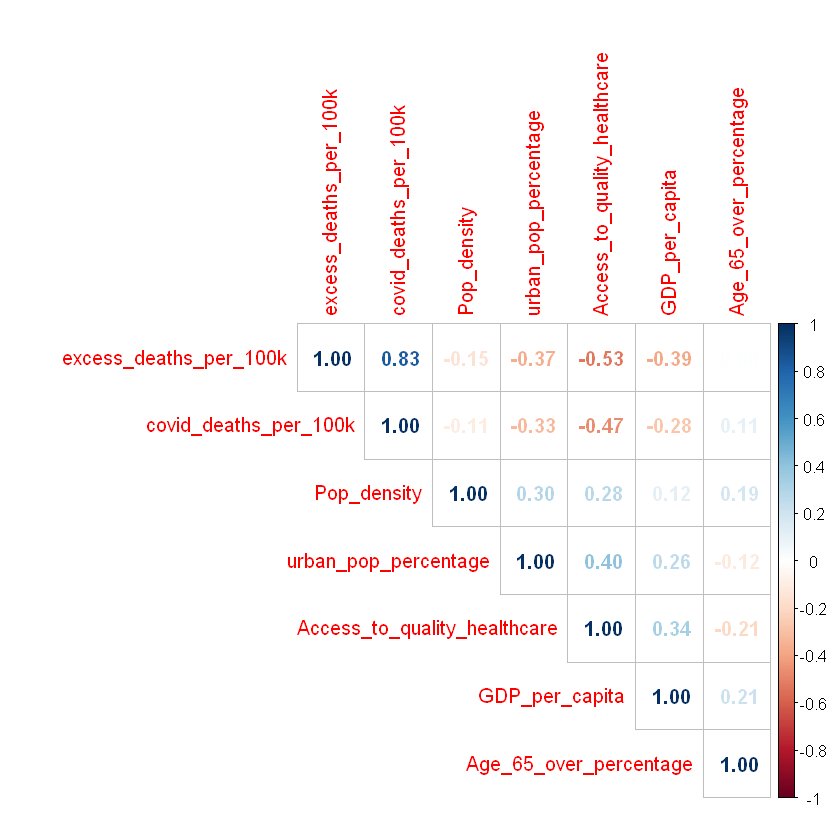

In [6]:
library(corrplot)

data1_select <- data1%>%
  select(excess_deaths_per_100k, covid_deaths_per_100k,  GDP_per_capita, Age_65_over_percentage, urban_pop_percentage, Pop_density,  Access_to_quality_healthcare)

# Convert selected columns to numeric
data1_select_numeric <- as.data.frame(sapply(data1_select, as.numeric))

# Calculate the correlation matrix
cor_matrix <- cor(data1_select_numeric)

corrplot(cor_matrix, method = "number", type = "upper", order = "hclust")


In [7]:
library("PerformanceAnalytics")



Warning message:
"package 'PerformanceAnalytics' was built under R version 4.3.2"
Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                    

Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphic

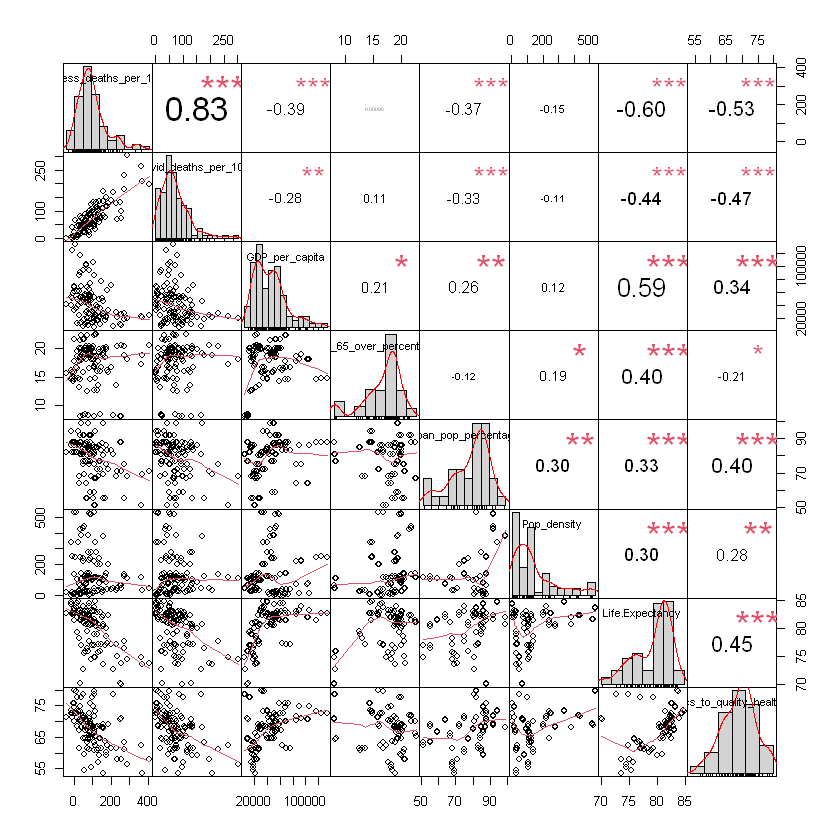

In [13]:

chart.Correlation(data1_select_numeric, histogram=TRUE, pch=19)

In the above plot:

The distribution of each variable is shown on the diagonal.

On the bottom of the diagonal : the bivariate scatter plots with a fitted line are displayed

On the top of the diagonal : the value of the correlation plus the significance level as stars

Each significance level is associated to a symbol : p-values(0, 0.001, 0.01, 0.05, 0.1, 1) <=> symbols(***, **, *, ".”, " “)

# For year 2020

In [10]:
data_2020 = data1 %>%
   filter(year==2020)
head(data_2020)

,country,countrycode,year,excess_deaths_per_100k,covid_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Australia,AUS,2020,-13.49899,3.547027,51868.248,16.2,86,3,72.6
2,Austria,AUT,2020,90.40592,86.420701,48789.498,19.1,59,108,66.6
3,Belgium,BEL,2020,159.48534,172.226530,45609.003,19.2,99,380,68.3
4,Canada,CAN,2020,38.75704,42.078907,43349.678,18.0,81,4,70.0
5,Chile,CHL,2020,73.40521,80.736714,13173.785,12.4,85,26,61.6
6,Colombia,COL,2020,108.66106,87.218909,5304.289,8.1,81,45,78.6


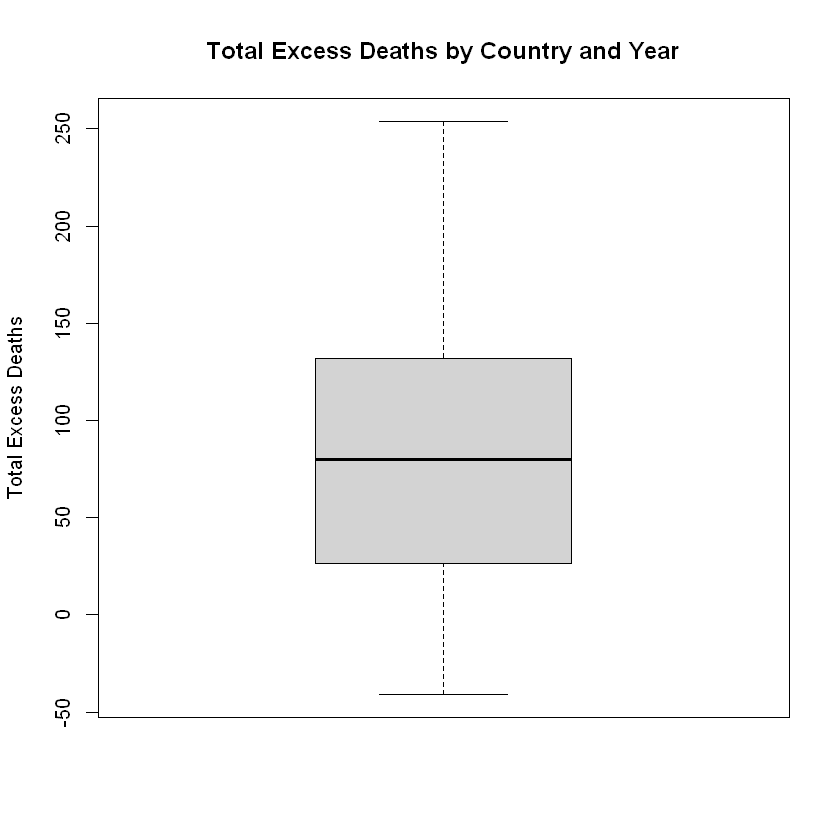

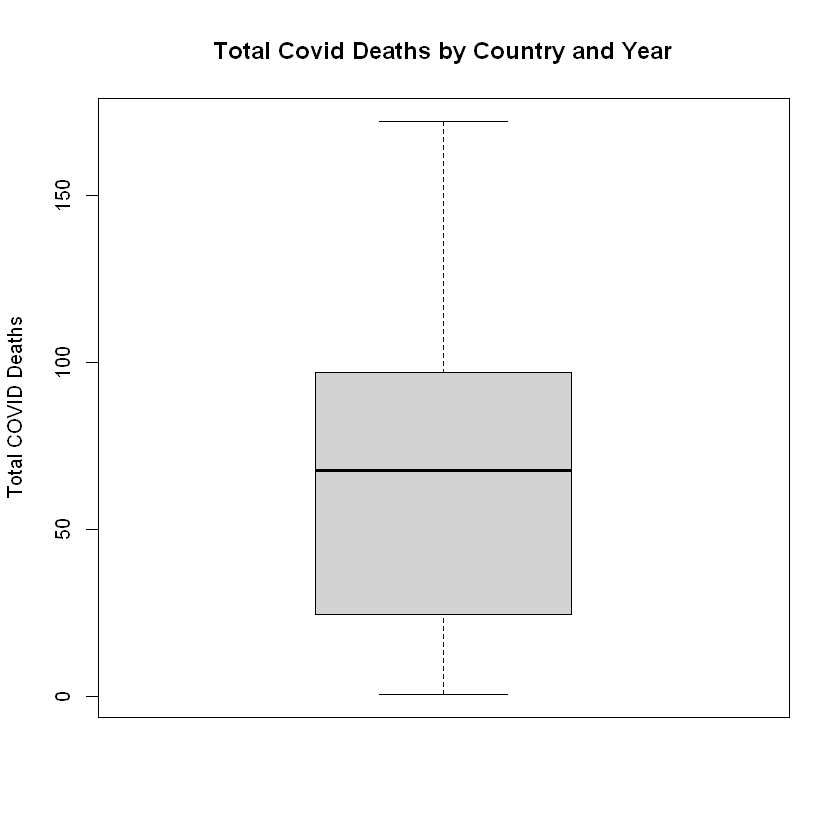

In [10]:
# Check for outliers using a boxplot
boxplot(data_2020$excess_deaths_per_100k, main="Total Excess Deaths by Country and Year", ylab="Total Excess Deaths")
boxplot(data_2020$covid_deaths_per_100k, main="Total Covid Deaths by Country and Year", ylab="Total COVID Deaths")

# no outlier for year 2020 

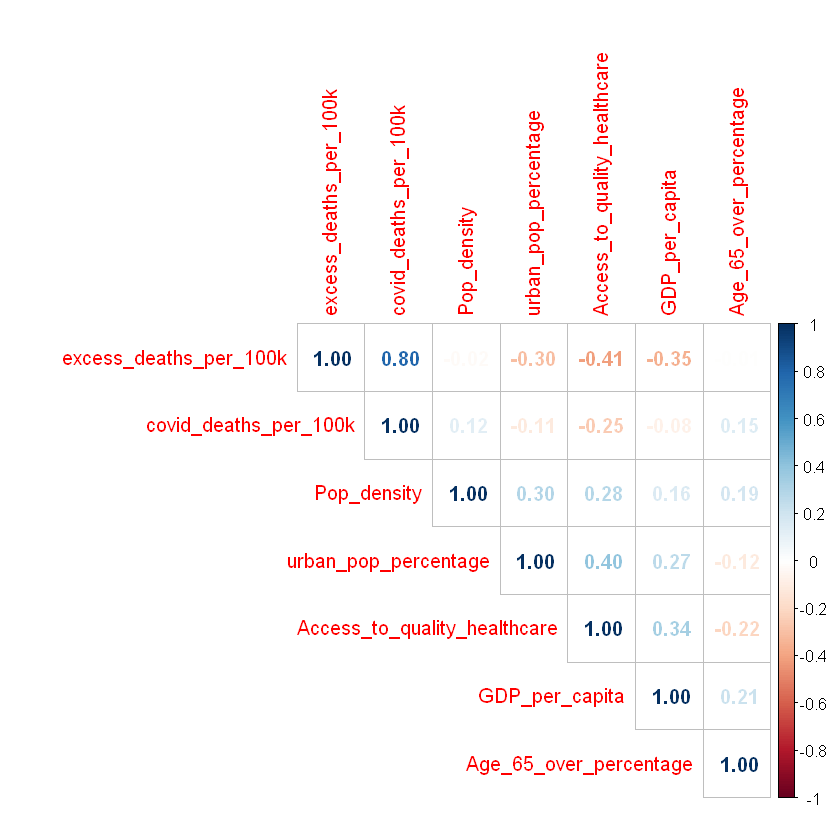

In [12]:
data1_select <- data_2020%>%
  select(excess_deaths_per_100k, covid_deaths_per_100k,  GDP_per_capita, Age_65_over_percentage, urban_pop_percentage, Pop_density, Access_to_quality_healthcare)

# Convert selected columns to numeric
data20_select_numeric <- as.data.frame(sapply(data1_select, as.numeric))

# Calculate the correlation matrix
cor_matrix <- cor(data20_select_numeric)

corrplot(cor_matrix, method = "number", type = "upper", order = "hclust")


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphic

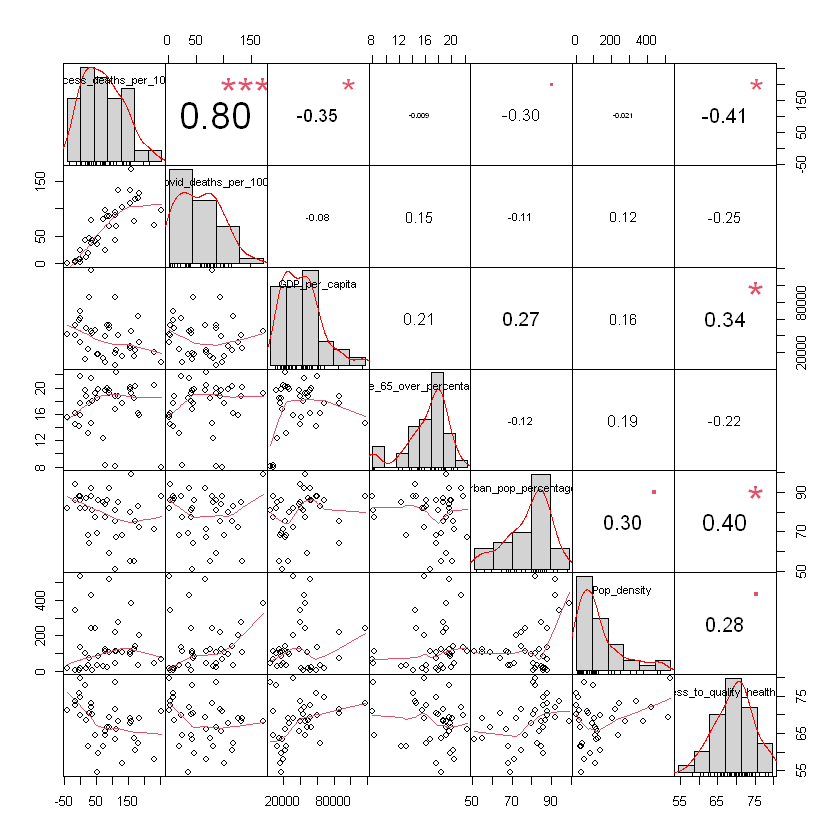

In [13]:
chart.Correlation(data20_select_numeric, histogram=TRUE, pch=19)

### pearson correlation and linear model for 2020

In [14]:
correlation_result_2020 <- cor.test(data_2020$excess_deaths_per_100k, data_2020$covid_deaths_per_100k, method = "pearson")

print(correlation_result_2020)
linear_model_2020 <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k, data = data_2020)
summary(linear_model_2020)


	Pearson's product-moment correlation

data:  data_2020$excess_deaths_per_100k and data_2020$covid_deaths_per_100k
t = 7.8748, df = 36, p-value = 2.422e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6379632 0.8890385
sample estimates:
     cor 
0.795423 




Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k, 
    data = data_2020)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.257 -26.587  -6.083  14.153 142.807 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.6321    12.8566  -0.049    0.961    
covid_deaths_per_100k   1.3028     0.1654   7.875 2.42e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 44.82 on 36 degrees of freedom
Multiple R-squared:  0.6327,	Adjusted R-squared:  0.6225 
F-statistic: 62.01 on 1 and 36 DF,  p-value: 2.422e-09


The Pearson correlation analysis and the simple linear regression for the 2020 data demonstrate a significant positive relationship between COVID-19 deaths per 100k and excess deaths per 100k.

The correlation coefficient of 0.7954 indicates a strong positive relationship, meaning that as COVID-19 deaths increase, excess deaths also tend to increase. The correlation is statistically significant, with a very low p-value (2.422e-09), indicating a high level of confidence in the relationship between these two variables.

The linear regression supports this finding, with a coefficient of 1.3028 for COVID-19 deaths per 100k. This suggests that for every increase of one death per 100k due to COVID-19, there is an associated increase of approximately 1.3 excess deaths per 100k. The regression model has an R-squared value of 0.6327, meaning it explains about 63.27% of the variance in excess death rates, which is a substantial amount, although other factors not included in the model may also play a role.

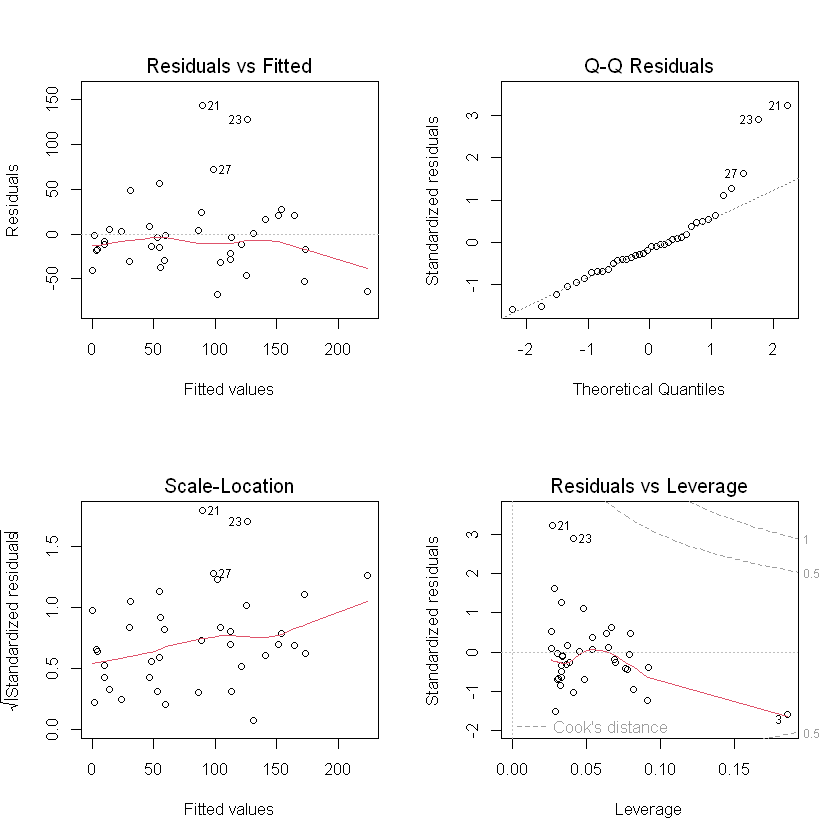

In [43]:
par(mfrow = c(2, 2)) 
plot(linear_model_2020)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?"


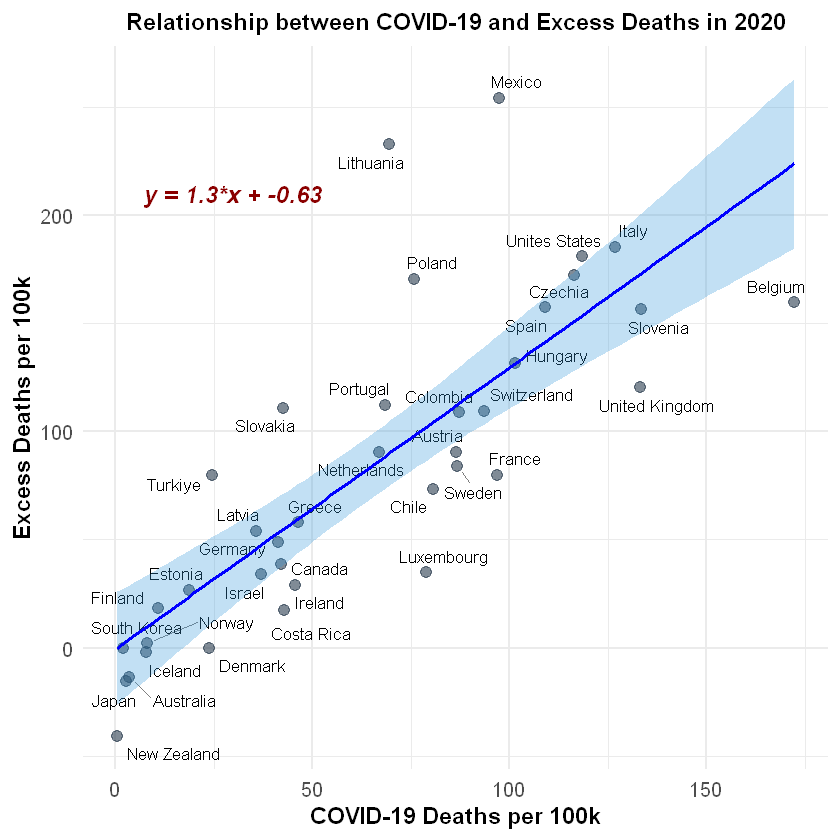

In [11]:
library(ggplot2)
library(ggrepel)
library(broom)


lm_fit <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k, data = data_2020)
equation <- broom::tidy(lm_fit)

# Extract the coefficients
intercept <- equation$estimate[1]
slope <- equation$estimate[2]


eq_label <- paste0("y = ", round(slope, 2), "*x + ", round(intercept, 2))

plot_2020 <- ggplot(data_2020, aes(x = covid_deaths_per_100k, y = excess_deaths_per_100k, label = country)) +
  geom_point(color = "#2C3E50", alpha = 0.6, size = 3) +
  geom_text_repel(size = 3.5, box.padding = 0.35, point.padding = 0.5, 
                  segment.color = 'grey50') +
  geom_smooth(method = "lm", color = "blue", fill = "#3498DB", alpha = 0.3) +
  annotate("text", x = 30, y = 210, label = eq_label, color = "darkred", size = 5, fontface = "bold.italic") +
  labs(
    title = "Relationship between COVID-19 and Excess Deaths in 2020",
    x = "COVID-19 Deaths per 100k",
    y = "Excess Deaths per 100k"
    
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12)
    #panel.grid.major = element_line(color = "grey80"),
    #panel.grid.minor = element_blank()
  )


print(plot_2020)


## multiple regression 2020

In [16]:
# Perform multiple linear regression
multiple_2020 <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k + covid_deaths_per_100k+ GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + Pop_density +Access_to_quality_healthcare, data = data_2020)

# Print summary of the regression
summary(multiple_2020)



Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    covid_deaths_per_100k + GDP_per_capita + Age_65_over_percentage + 
    urban_pop_percentage + Pop_density + Access_to_quality_healthcare, 
    data = data_2020)

Residuals:
    Min      1Q  Median      3Q     Max 
-60.800 -27.754  -3.473  14.879 118.891 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   2.526e+02  1.073e+02   2.353   0.0251 *  
covid_deaths_per_100k         1.222e+00  1.534e-01   7.965 5.42e-09 ***
GDP_per_capita               -5.553e-04  3.014e-04  -1.842   0.0751 .  
Age_65_over_percentage       -2.609e+00  2.039e+00  -1.280   0.2102    
urban_pop_percentage         -8.458e-01  6.393e-01  -1.323   0.1955    
Pop_density                   1.104e-02  5.210e-02   0.212   0.8336    
Access_to_quality_healthcare -1.717e+00  1.341e+00  -1.280   0.2100    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual sta

COVID Deaths per 100k: This variable is the most significant predictor in the model. For each additional COVID-19 death per 100,000 people, there is an increase of about 1.222 excess deaths per 100,000. The high t-value and the extremely low p-value (well below 0.05) indicate a statistically significant and robust relationship.

GDP per Capita: This variable shows a negative coefficient, but it is only marginally significant (p-value = 0.0751). This suggests that higher GDP per capita might be associated with a slight decrease in excess deaths per 100,000, although this relationship is not as firmly established.

Other Variables: Age over 65 percentage, urban population percentage, population density, and access to quality healthcare are included in the model but do not show statistically significant relationships with excess deaths per 100,000, as indicated by their p-values being above the 0.05 significance level.

Overall, the model explains a significant portion of the variance in excess deaths per 100k (Multiple R-squared = 0.7576), meaning about 75.76% of the variation is accounted for by the model. The model is statistically significant as a whole (p-value = 2.485e-08), with COVID-19 deaths per 100k emerging as a crucial factor in predicting excess deaths during 2020.

In [17]:
library(car)

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




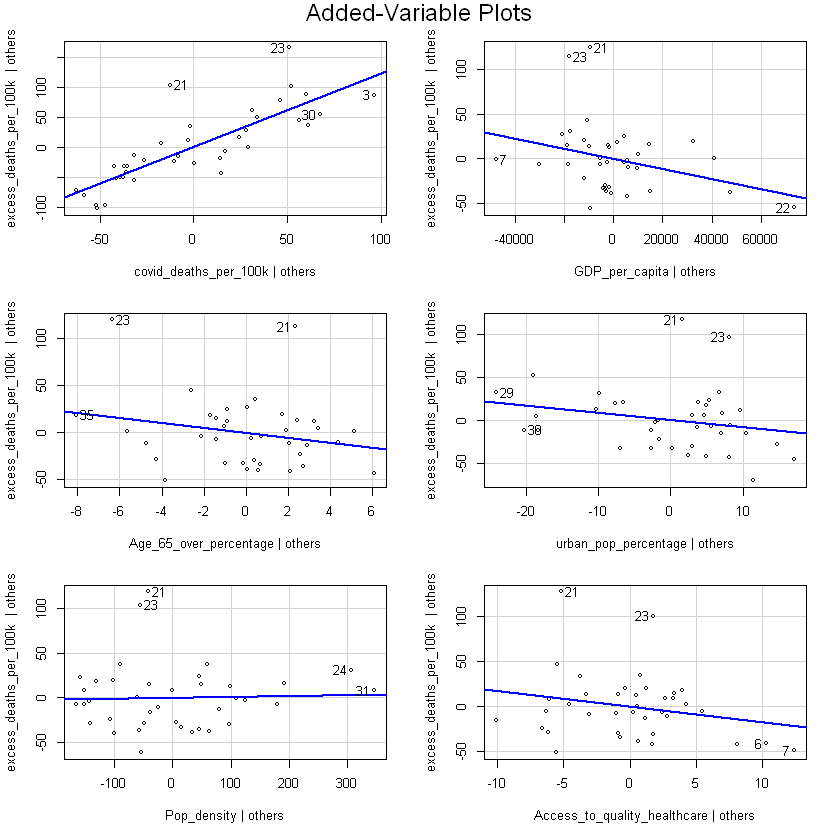

In [18]:
avPlots(multiple_2020)

This image shows a series of added-variable plots, also known as partial regression plots, for a multiple regression model. Each plot corresponds to one predictor variable in the model and shows the relationship between that predictor and the response variable (excess deaths per 100k) after accounting for the other variables in the model. 

COVID Deaths per 100k: There is a clear positive relationship with excess deaths per 100k, indicating that as the number of COVID deaths increases, the number of excess deaths also increases, after accounting for other variables.

GDP per Capita: This plot shows a slight negative trend, suggesting that higher GDP per capita might be associated with lower excess deaths per 100k. However, the relationship appears to be weak since the points are broadly distributed around the regression line.

Age 65 Over Percentage: The plot appears relatively flat, indicating that the percentage of the population over 65 may not have a strong unique effect on excess deaths per 100k when other factors are considered.

Urban Population Percentage: This plot also shows a relatively flat line, suggesting that the urban population percentage does not have a significant unique effect on excess deaths per 100k in the presence of other variables.

Population Density: The plot does not show a clear relationship between population density and excess deaths per 100k, as indicated by the flat slope and scattered points.

Access to Quality Healthcare: There is a slight downward trend, which might suggest that better access to quality healthcare is associated with fewer excess deaths per 100k. However, the wide scatter of points indicates that this relationship is not very strong when other variables are accounted for.

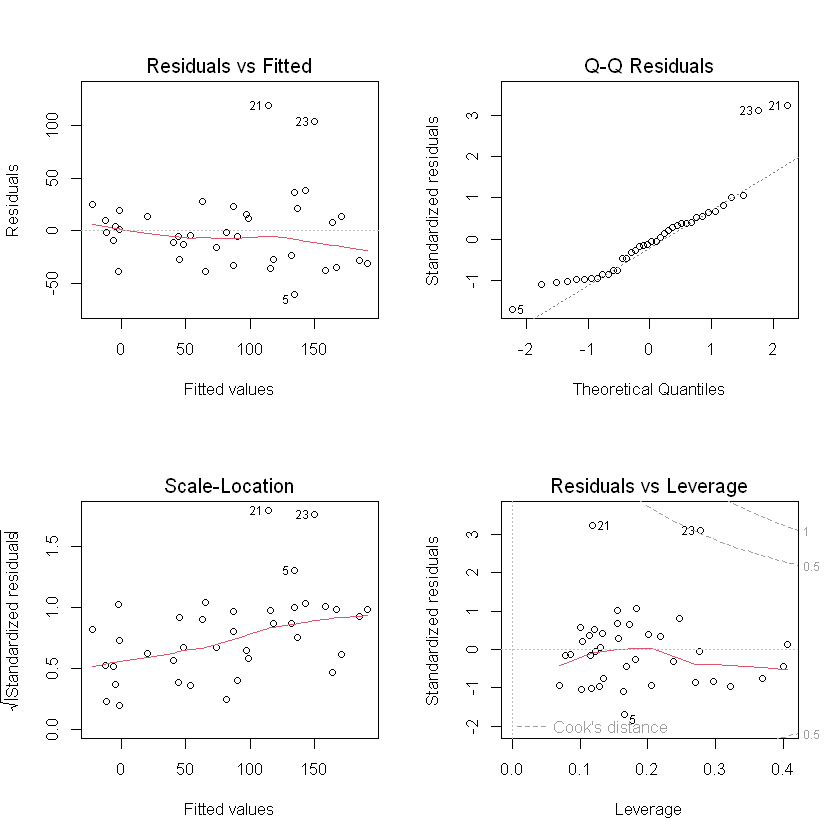

In [44]:
par(mfrow = c(2, 2)) 
plot(multiple_2020)

# for year 2021

In [12]:
data_2021 = data1 %>%
   filter(year==2021)
head(data_2021)

,country,countrycode,year,excess_deaths_per_100k,covid_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Australia,AUS,2021,18.93437,5.290392,60697.245,16.6,86,3,72.5
2,Austria,AUT,2021,88.79044,102.250791,53517.890,19.4,59,109,66.8
3,Belgium,BEL,2021,38.39384,74.701702,51850.397,19.4,99,382,68.0
4,Canada,CAN,2021,36.32867,37.615269,52358.622,18.5,81,4,70.0
5,Chile,CHL,2021,124.98873,114.887605,16240.608,12.7,85,26,61.0
6,Colombia,COL,2021,212.91193,168.359574,6182.707,8.2,81,46,78.5


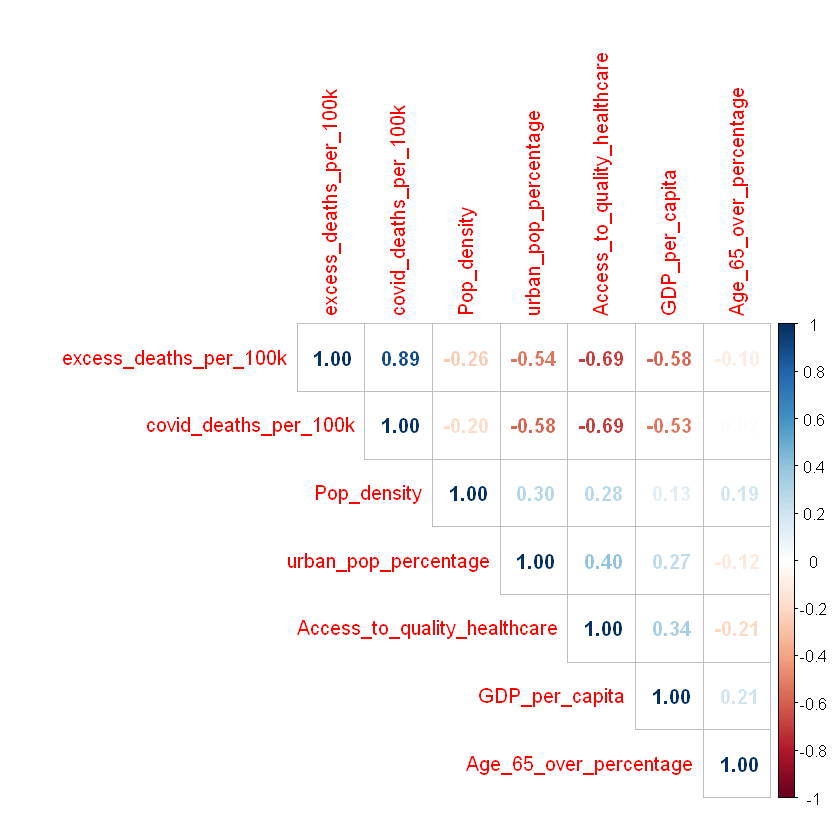

In [20]:
data1_select <- data_2021%>%
  select(excess_deaths_per_100k, covid_deaths_per_100k,  GDP_per_capita, Age_65_over_percentage, urban_pop_percentage, Pop_density, Access_to_quality_healthcare)

# Convert selected columns to numeric
data21_select_numeric <- as.data.frame(sapply(data1_select, as.numeric))

# Calculate the correlation matrix
cor_matrix <- cor(data21_select_numeric)

corrplot(cor_matrix, method = "number", type = "upper", order = "hclust")


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphic

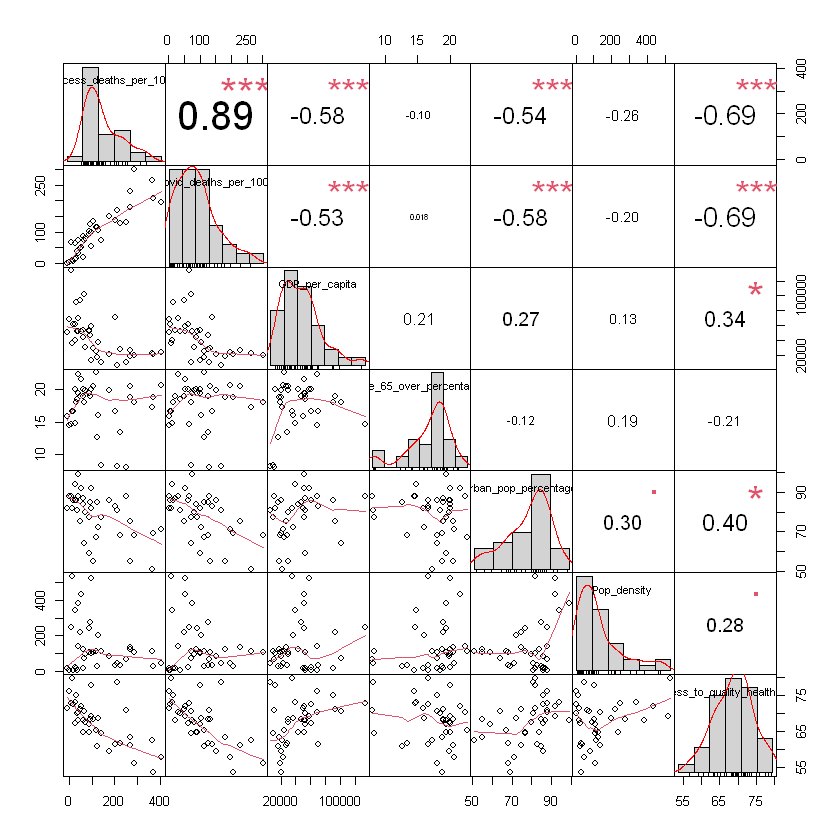

In [21]:
chart.Correlation(data21_select_numeric, histogram=TRUE, pch=19)

### pearson correlation and linear model for 2021

In [22]:
correlation_result_2021<- cor.test(data_2021$excess_deaths_per_100k, data_2021$covid_deaths_per_100k, method = "pearson")

print(correlation_result_2021)
linear_model_2021 <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k, data = data_2021)
summary(linear_model_2021)


	Pearson's product-moment correlation

data:  data_2021$excess_deaths_per_100k and data_2021$covid_deaths_per_100k
t = 11.834, df = 36, p-value = 5.75e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8004669 0.9427815
sample estimates:
      cor 
0.8919133 




Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k, 
    data = data_2021)

Residuals:
    Min      1Q  Median      3Q     Max 
-109.10  -28.25   -3.79   21.80  152.76 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -9.9970    14.0240  -0.713    0.481    
covid_deaths_per_100k   1.3439     0.1136  11.834 5.75e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.09 on 36 degrees of freedom
Multiple R-squared:  0.7955,	Adjusted R-squared:  0.7898 
F-statistic:   140 on 1 and 36 DF,  p-value: 5.75e-14


The Pearson product-moment correlation analysis between excess deaths per 100k and COVID deaths per 100k for the year 2021 shows a very strong positive correlation, with a coefficient of 0.8919. This indicates a strong positive relationship, meaning that as COVID deaths per 100k increase, excess deaths per 100k also tend to increase. The p-value is extremely small (5.75e-14), far below the 0.05 threshold for statistical significance, which strongly suggests that the correlation is not due to random chance.

Furthermore, a simple linear regression model with COVID deaths per 100k as a predictor for excess deaths per 100k for the same year supports this finding. The regression coefficient for COVID deaths per 100k is 1.3439, indicating that for each additional COVID-19 death per 100,000 people, there is an increase of approximately 1.3439 excess deaths per 100,000. The t-value for this predictor is 11.834, which, combined with the extremely low p-value, confirms the predictor's statistical significance.

The model's R-squared value of 0.7955 suggests that about 79.55% of the variability in excess deaths per 100k can be explained by COVID deaths per 100k. The residual standard error indicates the average distance that the data points fall from the regression line is approximately 51.09 deaths per 100k. In summary, the data presents strong evidence that there is a significant and substantial relationship between COVID deaths and excess deaths for the year 2021.

Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


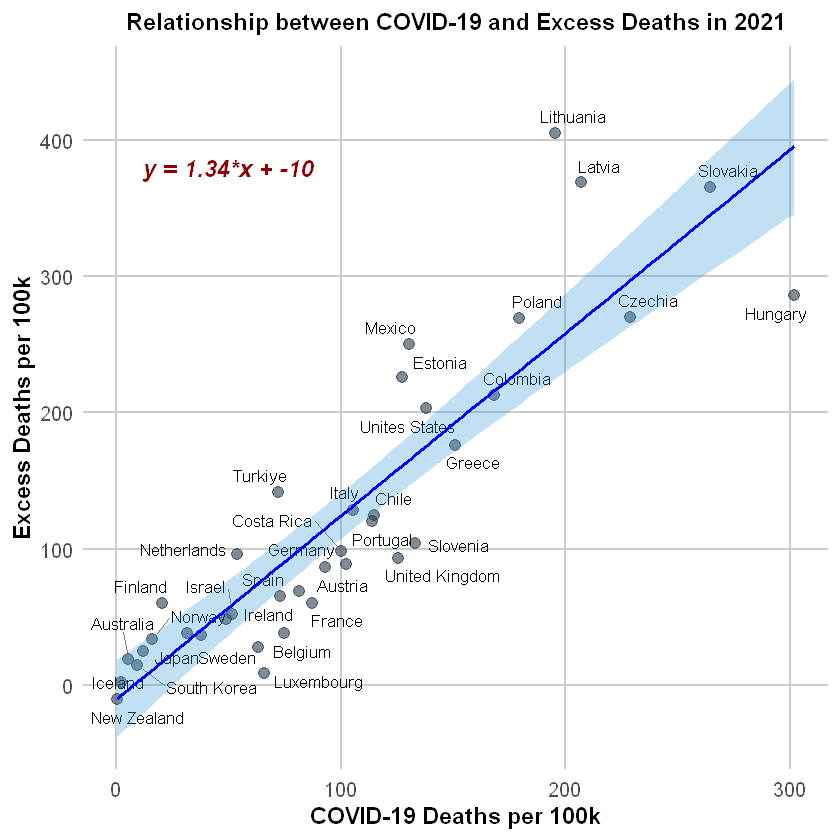

In [13]:
lm_fit_21 <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k, data = data_2021)
equation_21 <- broom::tidy(lm_fit_21)

# Extract the coefficients
intercept_21 <- equation_21$estimate[1]
slope_21 <- equation_21$estimate[2]


eq_label_21 <- paste0("y = ", round(slope_21, 2), "*x + ", round(intercept_21, 2))

plot_2021 <- ggplot(data_2021, aes(x = covid_deaths_per_100k, y = excess_deaths_per_100k)) +
  geom_point(color = "#2C3E50", alpha = 0.6, size = 3) +
  geom_text_repel(aes(label = country), size = 3.5, box.padding = 0.35, point.padding = 0.5, 
                  segment.color = 'grey50', max.overlaps = 10) +
  geom_smooth(method = "lm", formula = y ~ x, color = "blue", fill = "#3498DB", alpha = 0.3) +
  annotate("text", x = 50, y = 380, label = eq_label_21, color = "darkred", size = 5, fontface = "bold.italic") +
  labs(
    title = "Relationship between COVID-19 and Excess Deaths in 2021", # Correct the year in the title
    x = "COVID-19 Deaths per 100k",
    y = "Excess Deaths per 100k"
    
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    panel.grid.major = element_line(color = "grey80"),
    panel.grid.minor = element_blank()
  )

# Print the plot
print(plot_2021)

## multiple regression 2021

In [24]:


multiple_2021 <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k + covid_deaths_per_100k+ GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + Pop_density  + Access_to_quality_healthcare, data = data_2021)

summary(multiple_2021)



Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    covid_deaths_per_100k + GDP_per_capita + Age_65_over_percentage + 
    urban_pop_percentage + Pop_density + Access_to_quality_healthcare, 
    data = data_2021)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.456 -29.417   0.532  26.261 148.975 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.959e+02  1.890e+02   2.094   0.0445 *  
covid_deaths_per_100k         1.002e+00  1.884e-01   5.321 8.57e-06 ***
GDP_per_capita               -4.666e-04  3.460e-04  -1.349   0.1873    
Age_65_over_percentage       -4.109e+00  2.518e+00  -1.631   0.1129    
urban_pop_percentage         -5.023e-01  9.017e-01  -0.557   0.5815    
Pop_density                  -1.425e-02  6.381e-02  -0.223   0.8248    
Access_to_quality_healthcare -3.511e+00  1.970e+00  -1.782   0.0846 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual sta

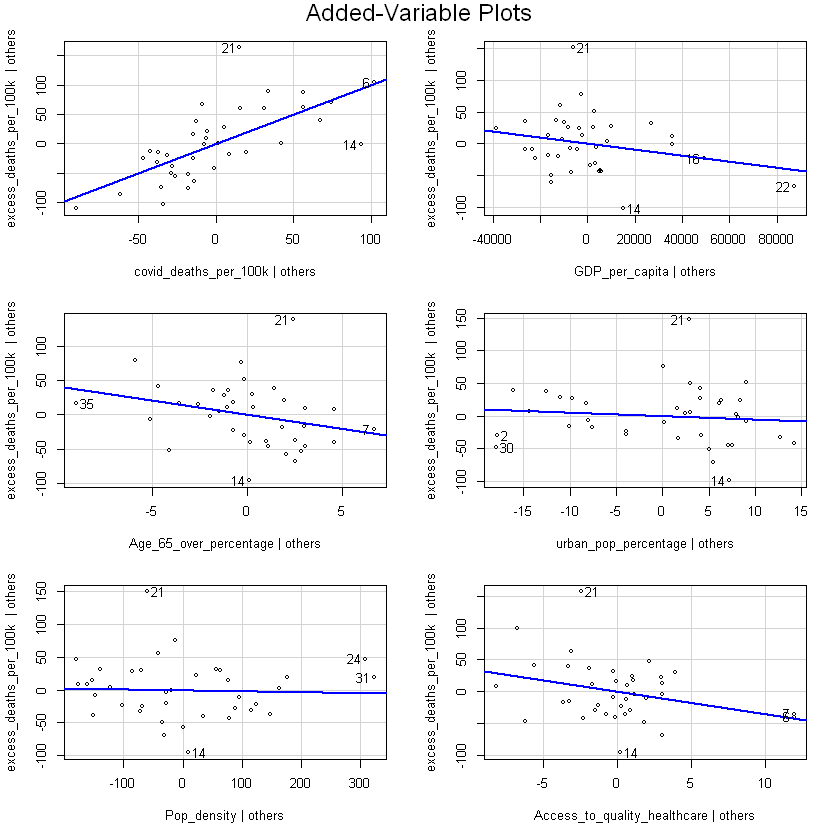

In [25]:
avPlots(multiple_2021)

COVID-19 Deaths per 100k: This is a significant predictor of excess deaths per 100k. The coefficient of 1.002 indicates that for each additional COVID-19 death per 100k, there is an increase of approximately 1.002 excess deaths per 100k. The relationship is statistically significant, as shown by the very low p-value (8.57e-06).

Access to Quality Healthcare: The negative coefficient suggests that better access to quality healthcare is associated with fewer excess deaths per 100k. The relationship is approaching significance (p-value = 0.0846), implying potential relevance.



Other Variables: GDP per capita, age over 65 percentage, urban population percentage, and population density do not have a statistically significant impact on excess deaths, as their p-values are above the standard significance level.

The model's overall fit is good, with an R-squared value of 0.8407, indicating that about 84.07% of the variability in excess death rates can be explained by the combined effects of these variables. The model is statistically significant, as shown by the F-statistic (27.28) with a very low p-value (4.479e-11), suggesting that the set of independent variables, as a whole, reliably predicts excess death rates.

In conclusion, COVID-19 deaths per 100k emerge as a significant predictor of excess deaths in 2021, while the other variables' influence is less clear from this model. Factors like GDP per capita, Age 65 over percentage, urban population percentage, and population density do not show a significant unique effect, whereas access to quality healthcare shows a trend towards significance 

# check if year 2021 has outlier 

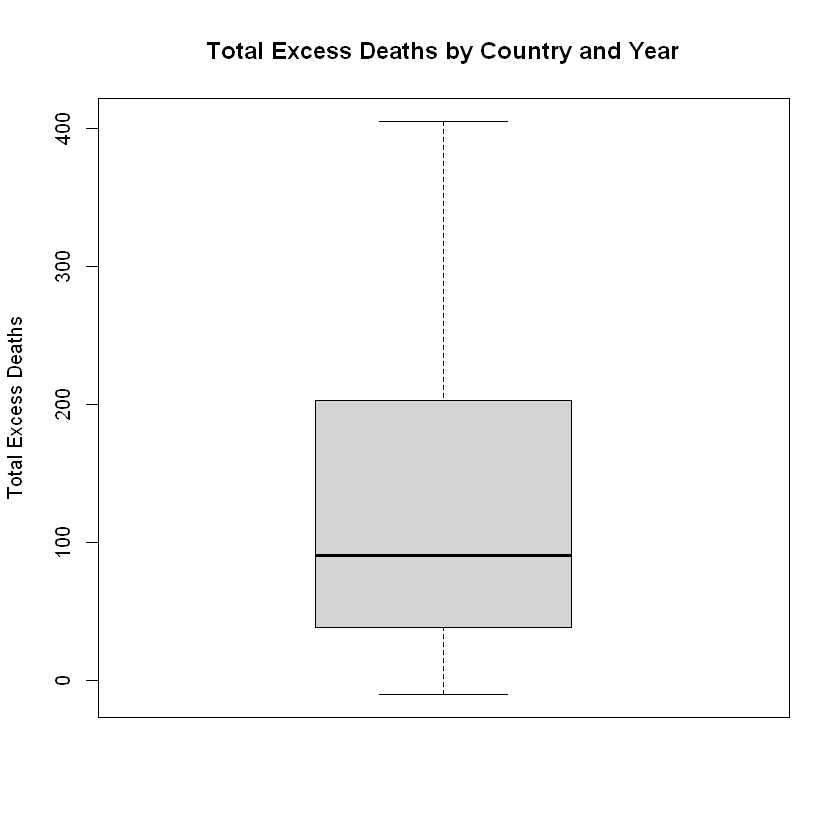

In [26]:
# Check for outliers using a boxplot
boxplot(data_2021$excess_deaths_per_100k, main="Total Excess Deaths by Country and Year", ylab="Total Excess Deaths")




# for year 2022

In [15]:
data_2022 = data1 %>%
   filter(year==2022)
head(data_2022)

,country,countrycode,year,excess_deaths_per_100k,covid_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Australia,AUS,2022,84.34512,55.57580,65099.846,16.6,86,3,72.5
2,Austria,AUT,2022,108.51695,51.79581,52084.681,19.4,59,110,66.8
3,Belgium,BEL,2022,77.13805,42.06760,49926.825,19.4,99,384,68.0
4,Canada,CAN,2022,87.88113,49.39134,54917.663,18.5,81,4,70.0
5,Chile,CHL,2022,111.92763,63.49931,15355.480,12.7,85,27,61.0
6,Colombia,COL,2022,50.78050,22.93805,6624.165,8.2,81,47,78.5


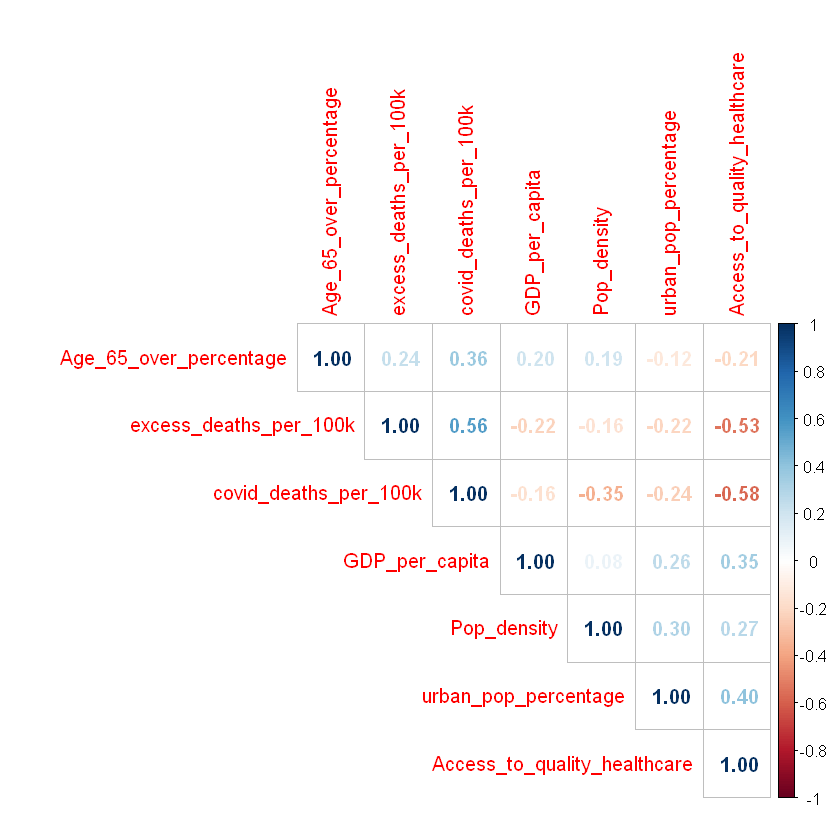

In [28]:
data1_select <- data_2022%>%
  select(excess_deaths_per_100k, covid_deaths_per_100k,  GDP_per_capita, Age_65_over_percentage, urban_pop_percentage, Pop_density, Access_to_quality_healthcare)

# Convert selected columns to numeric
data22_select_numeric <- as.data.frame(sapply(data1_select, as.numeric))

# Calculate the correlation matrix
cor_matrix <- cor(data22_select_numeric)

corrplot(cor_matrix, method = "number", type = "upper", order = "hclust")


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphic

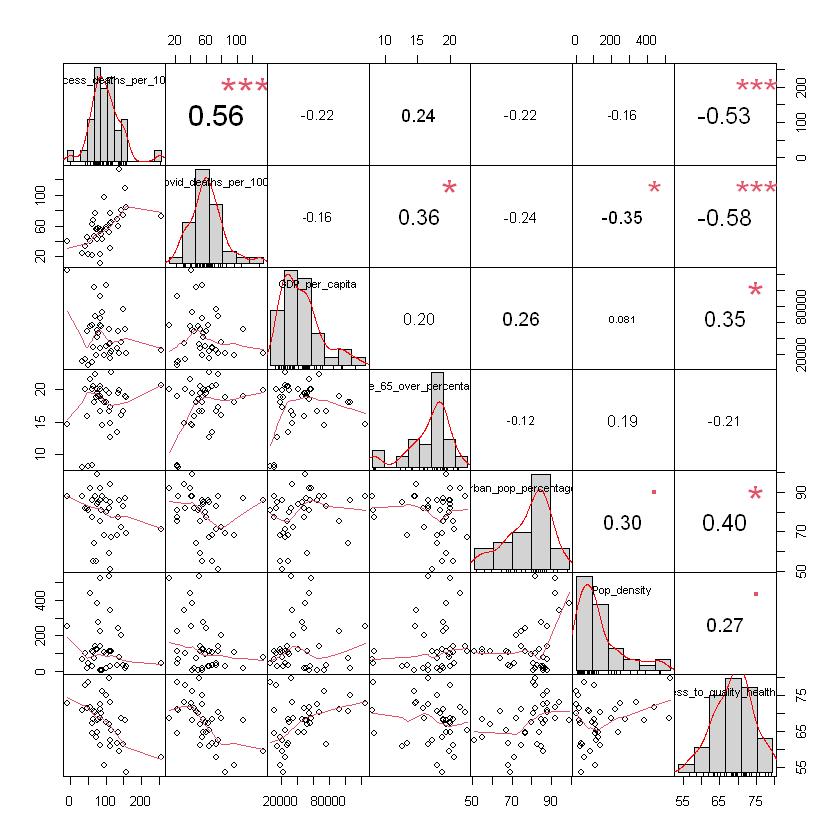

In [29]:
chart.Correlation(data22_select_numeric, histogram=TRUE, pch=19)

### pearson correlation and linear model for 2022

In [30]:
correlation_result_2022 <- cor.test(data_2022$excess_deaths_per_100k, data_2022$covid_deaths_per_100k, method = "pearson")

print(correlation_result_2022)
linear_model_2022 <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k, data = data_2022)
summary(linear_model_2022)


	Pearson's product-moment correlation

data:  data_2022$excess_deaths_per_100k and data_2022$covid_deaths_per_100k
t = 4.0193, df = 36, p-value = 0.0002849
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2881339 0.7438836
sample estimates:
      cor 
0.5565523 




Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k, 
    data = data_2022)

Residuals:
   Min     1Q Median     3Q    Max 
-88.12 -21.19  -0.38  20.33 145.36 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            36.8504    15.6585   2.353 0.024184 *  
covid_deaths_per_100k   1.0218     0.2542   4.019 0.000285 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 37.95 on 36 degrees of freedom
Multiple R-squared:  0.3098,	Adjusted R-squared:  0.2906 
F-statistic: 16.16 on 1 and 36 DF,  p-value: 0.0002849


Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


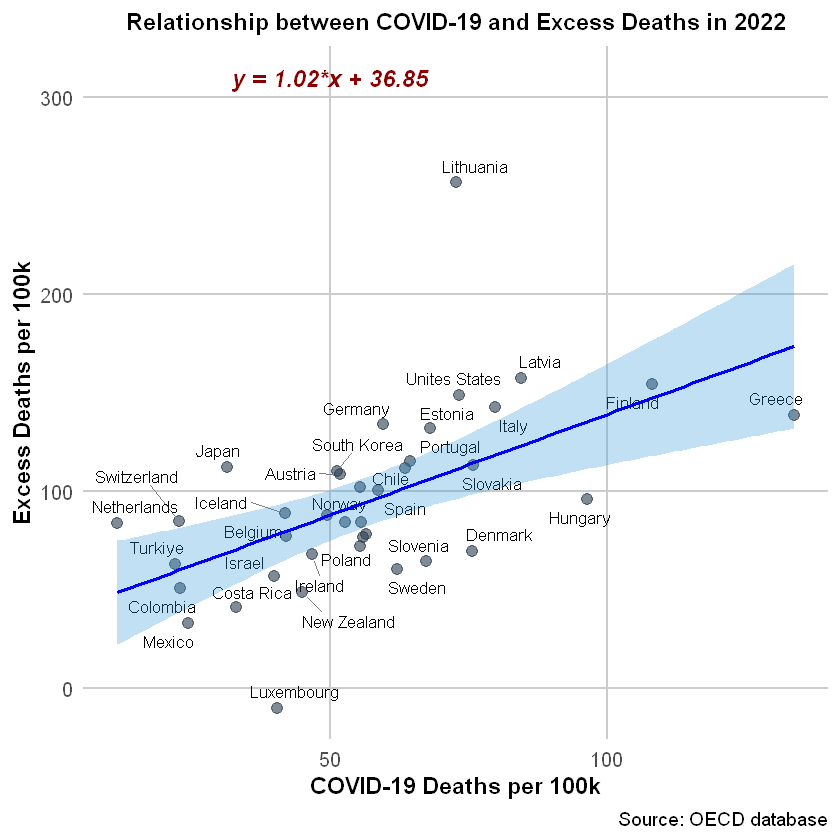

In [48]:
lm_fit_22 <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k, data = data_2022)
equation_22 <- broom::tidy(lm_fit_22)

# Extract the coefficients
intercept_22 <- equation_22$estimate[1]
slope_22 <- equation_22$estimate[2]


eq_label_22 <- paste0("y = ", round(slope_22, 2), "*x + ", round(intercept_22, 2))

plot_2022 <- ggplot(data_2022, aes(x = covid_deaths_per_100k, y = excess_deaths_per_100k)) +
  geom_point(color = "#2C3E50", alpha = 0.6, size = 3) +
  geom_text_repel(aes(label = country), size = 3.5, box.padding = 0.35, point.padding = 0.5, 
                  segment.color = 'grey50', max.overlaps = 10) +
  geom_smooth(method = "lm", formula = y ~ x, color = "blue", fill = "#3498DB", alpha = 0.3) +
  annotate("text", x = 50, y = 310, label = eq_label_22, color = "darkred", size = 5, fontface = "bold.italic") +
  labs(
    title = "Relationship between COVID-19 and Excess Deaths in 2022", # Correct the year in the title
    x = "COVID-19 Deaths per 100k",
    y = "Excess Deaths per 100k",
    caption = "Source: OECD database"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    panel.grid.major = element_line(color = "grey80"),
    panel.grid.minor = element_blank()
  )

# Print the plot
print(plot_2022)

## multiple regression 2022


In [32]:


# Perform multiple linear regression
multiple_2022 <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k + covid_deaths_per_100k+ GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + Pop_density +Access_to_quality_healthcare, data = data_2022)

# Print summary of the regression
summary(multiple_2022)



Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    covid_deaths_per_100k + GDP_per_capita + Age_65_over_percentage + 
    urban_pop_percentage + Pop_density + Access_to_quality_healthcare, 
    data = data_2022)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.876 -25.824   0.752  23.346 127.102 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)  
(Intercept)                   1.947e+02  1.091e+02   1.785   0.0840 .
covid_deaths_per_100k         6.860e-01  3.601e-01   1.905   0.0661 .
GDP_per_capita               -1.207e-04  2.544e-04  -0.474   0.6386  
Age_65_over_percentage        6.132e-01  2.178e+00   0.282   0.7801  
urban_pop_percentage          5.439e-03  6.357e-01   0.009   0.9932  
Pop_density                   1.636e-02  5.404e-02   0.303   0.7641  
Access_to_quality_healthcare -2.174e+00  1.400e+00  -1.553   0.1305  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 38.

# outlier 

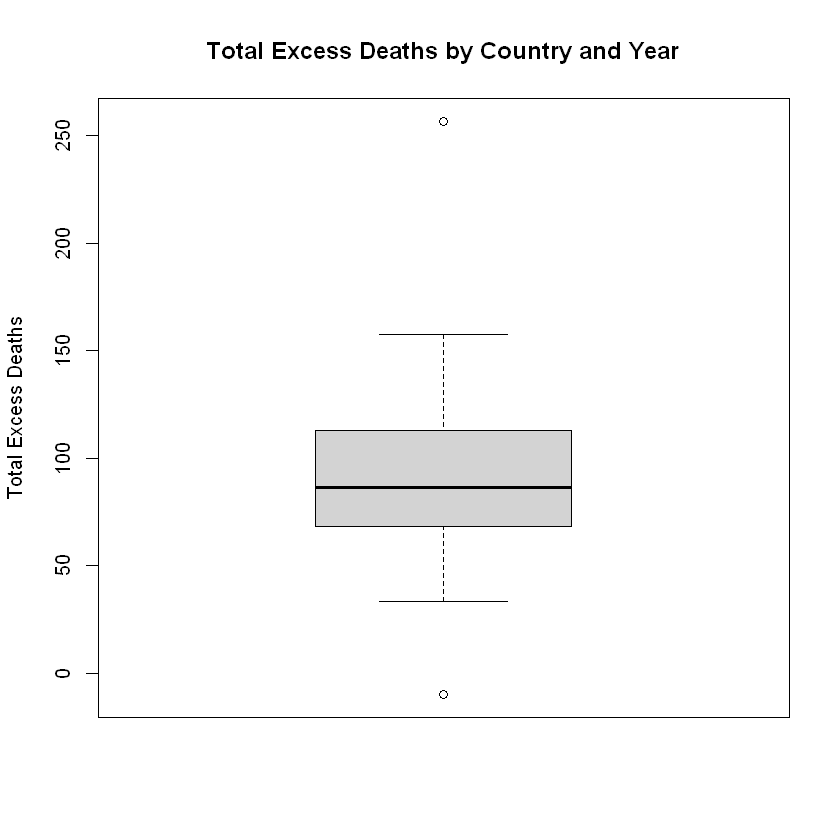

In [33]:

boxplot(data_2022$excess_deaths_per_100k, main="Total Excess Deaths by Country and Year", ylab="Total Excess Deaths")



In [33]:
Q1 <- quantile(data_2022$excess_deaths_per_100k, 0.25)
Q3 <- quantile(data_2022$excess_deaths_per_100k, 0.75)
IQR_val <- Q3 - Q1

# Identify potential outliers
potential_outliers_excess <- data_2022$excess_deaths_per_100k < (Q1 - 1.5 * IQR_val) | data_2022$excess_deaths_per_100k > (Q3 + 1.5 * IQR_val)

# Print or visualize potential outliers
print(data_2022[potential_outliers_excess, 'country' ])


[1] "Lithuania"  "Luxembourg"


In [16]:
outlier_2022 = subset(data_2022, !(country %in% c("Lithuania", "Luxembourg")))
     

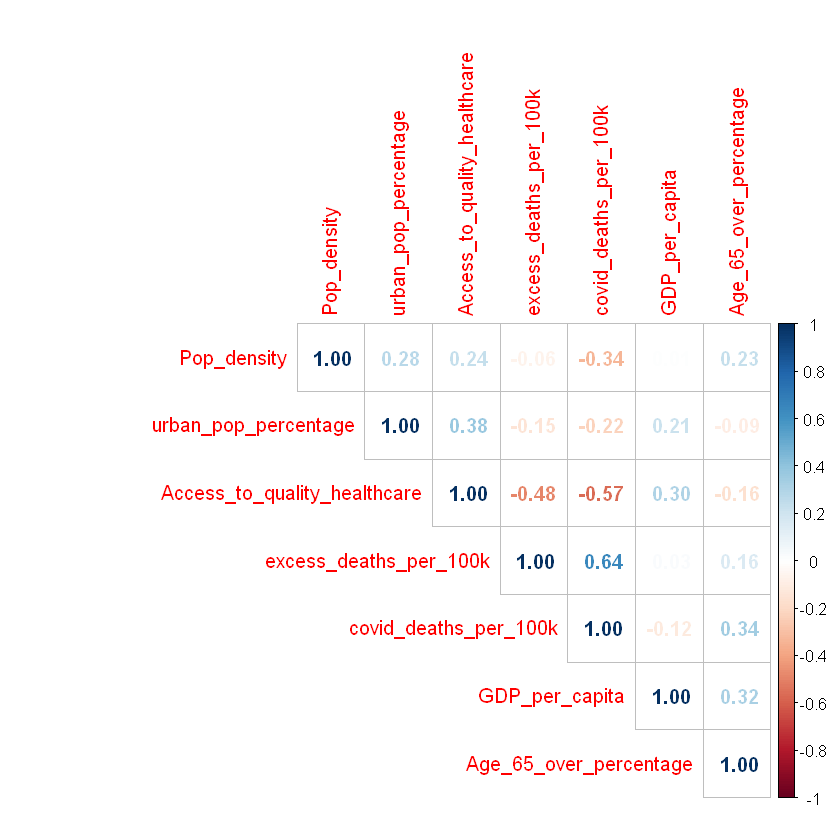

In [36]:
data2022_select <- outlier_2022%>%
  select(excess_deaths_per_100k, covid_deaths_per_100k,  GDP_per_capita, Age_65_over_percentage, urban_pop_percentage, Pop_density, Access_to_quality_healthcare)

# Convert selected columns to numeric
data22_outlier_numeric <- as.data.frame(sapply(data2022_select, as.numeric))

# Calculate the correlation matrix
cor_matrix <- cor(data22_outlier_numeric)

corrplot(cor_matrix, method = "number", type = "upper", order = "hclust")


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphic

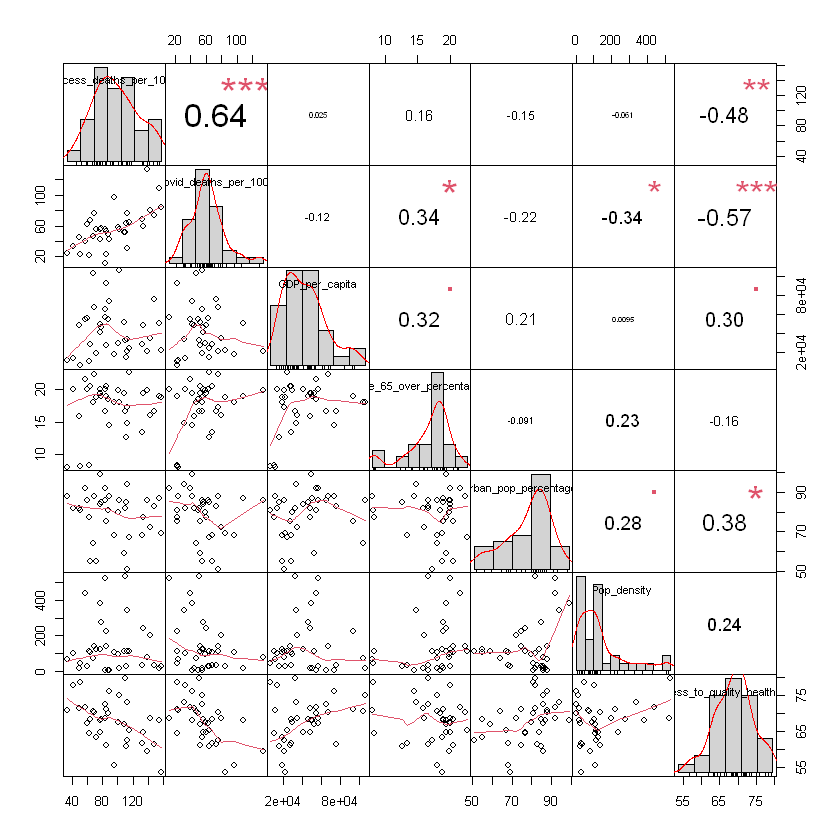

In [37]:
chart.Correlation(data22_outlier_numeric, histogram=TRUE, pch=19)

In [38]:
correlation_outlier_2022 <- cor.test(outlier_2022$excess_deaths_per_100k, outlier_2022$covid_deaths_per_100k, method = "pearson")

print(correlation_outlier_2022)
lm_outlier_2022 <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k, data = outlier_2022)
summary(lm_outlier_2022)


	Pearson's product-moment correlation

data:  outlier_2022$excess_deaths_per_100k and outlier_2022$covid_deaths_per_100k
t = 4.8956, df = 34, p-value = 2.345e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3986955 0.8020985
sample estimates:
      cor 
0.6430066 




Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k, 
    data = outlier_2022)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.714 -19.825   0.067  19.775  41.431 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            45.1051    10.6942   4.218 0.000173 ***
covid_deaths_per_100k   0.8480     0.1732   4.896 2.34e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.55 on 34 degrees of freedom
Multiple R-squared:  0.4135,	Adjusted R-squared:  0.3962 
F-statistic: 23.97 on 1 and 34 DF,  p-value: 2.345e-05


After removing outliers from your 2022 dataset, the Pearson product-moment correlation indicates a moderate to strong positive correlation between excess deaths per 100k and COVID-19 deaths per 100k, with a correlation coefficient of 0.6430. This positive correlation, with a statistically significant p-value of 2.345e-05, suggests that increases in COVID-19 deaths are associated with increases in excess deaths, albeit the relationship is less strong compared to the previous year's data.

The linear regression model with COVID-19 deaths per 100k as a predictor of excess deaths per 100k further supports this finding. The estimated regression coefficient for COVID-19 deaths per 100k is 0.8480, indicating that for each increase of one COVID-19 death per 100k, there is an associated increase of 0.8480 excess deaths per 100k. The intercept, representing the expected value of excess deaths per 100k when COVID-19 deaths per 100k are zero, is 45.1051. Both the intercept and slope are statistically significant (p-values < 0.05).

The model's R-squared value of 0.4135 suggests that around 41.35% of the variance in the excess deaths per 100k can be explained by COVID-19 deaths per 100k after removing outliers. This indicates that while COVID-19 deaths are an important factor in excess death rates, more than half of the variability in excess deaths is due to other factors not included in the model.

In summary, this analysis indicates that while there is a significant positive relationship between COVID-19 deaths and excess deaths in 2022, the strength of this relationship is moderate, and other unexamined factors also contribute to the variation in excess death rates.

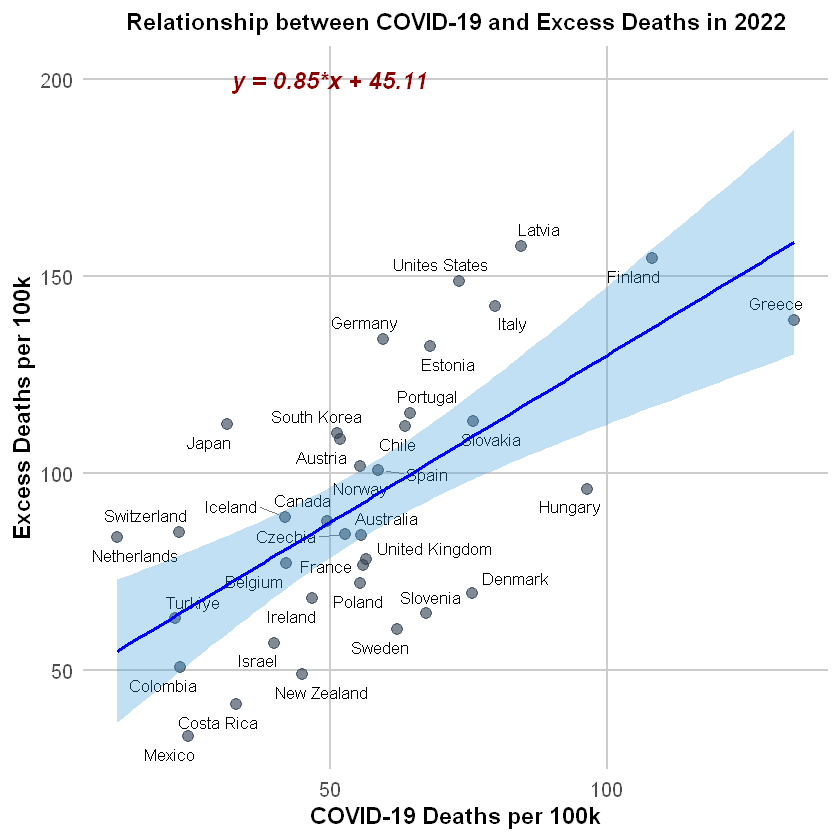

In [17]:
lm_fit_22_out <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k, data = outlier_2022)
equation_22_out <- broom::tidy(lm_fit_22_out)

# Extract the coefficients
intercept_22_out <- equation_22_out$estimate[1]
slope_22_out <- equation_22_out$estimate[2]


eq_label_22_out <- paste0("y = ", round(slope_22_out, 2), "*x + ", round(intercept_22_out, 2))

plot_2022_out <- ggplot(outlier_2022, aes(x = covid_deaths_per_100k, y = excess_deaths_per_100k)) +
  geom_point(color = "#2C3E50", alpha = 0.6, size = 3) +
  geom_text_repel(aes(label = country), size = 3.5, box.padding = 0.35, point.padding = 0.5, 
                  segment.color = 'grey50', max.overlaps = 10) +
  geom_smooth(method = "lm", formula = y ~ x, color = "blue", fill = "#3498DB", alpha = 0.3) +
  annotate("text", x = 50, y = 200, label = eq_label_22_out, color = "darkred", size = 5, fontface = "bold.italic") +
  labs(
    title = "Relationship between COVID-19 and Excess Deaths in 2022", # Correct the year in the title
    x = "COVID-19 Deaths per 100k",
    y = "Excess Deaths per 100k"
    
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    panel.grid.major = element_line(color = "grey80"),
    panel.grid.minor = element_blank()
  )

# Print the plot
print(plot_2022_out)

In [40]:

# Perform multiple linear regression
multiple_outlier_2022 <- lm(excess_deaths_per_100k ~ covid_deaths_per_100k + covid_deaths_per_100k+ GDP_per_capita + Age_65_over_percentage + urban_pop_percentage + Pop_density +Access_to_quality_healthcare, data = outlier_2022)

# Print summary of the regression
summary(multiple_outlier_2022)



Call:
lm(formula = excess_deaths_per_100k ~ covid_deaths_per_100k + 
    covid_deaths_per_100k + GDP_per_capita + Age_65_over_percentage + 
    urban_pop_percentage + Pop_density + Access_to_quality_healthcare, 
    data = outlier_2022)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.939 -20.133   3.736  18.846  35.423 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.752e+02  7.010e+01   2.499 0.018376 *  
covid_deaths_per_100k         9.776e-01  2.302e-01   4.246 0.000204 ***
GDP_per_capita                3.915e-04  1.910e-04   2.049 0.049557 *  
Age_65_over_percentage       -2.952e+00  1.489e+00  -1.983 0.056906 .  
urban_pop_percentage         -2.122e-01  4.010e-01  -0.529 0.600793    
Pop_density                   7.860e-02  3.542e-02   2.219 0.034442 *  
Access_to_quality_healthcare -1.427e+00  9.028e-01  -1.581 0.124686    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual 

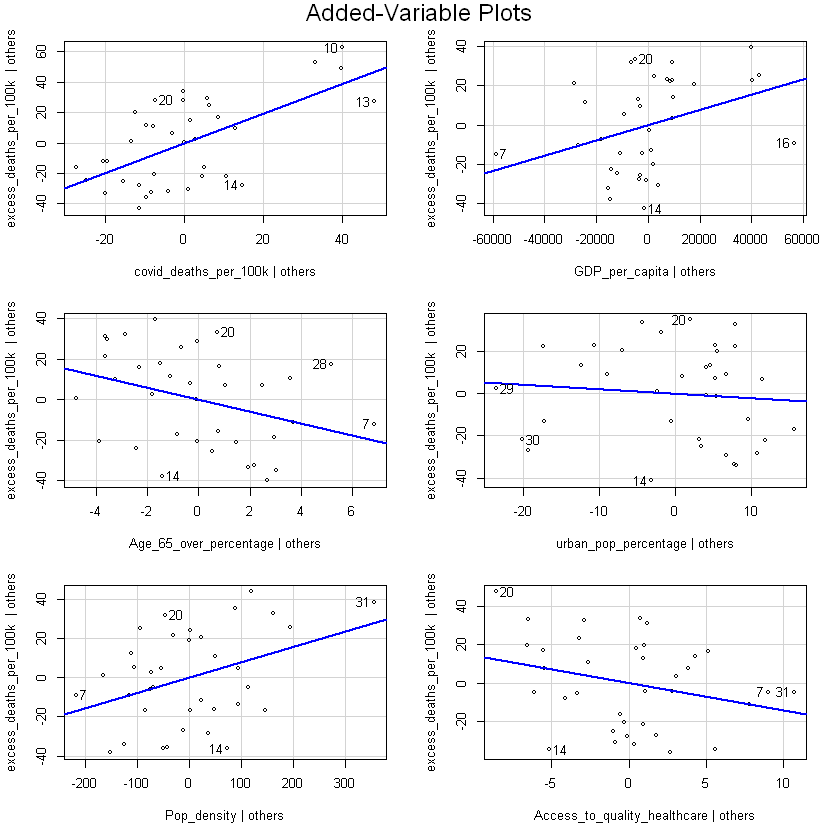

In [41]:
avPlots(multiple_outlier_2022)

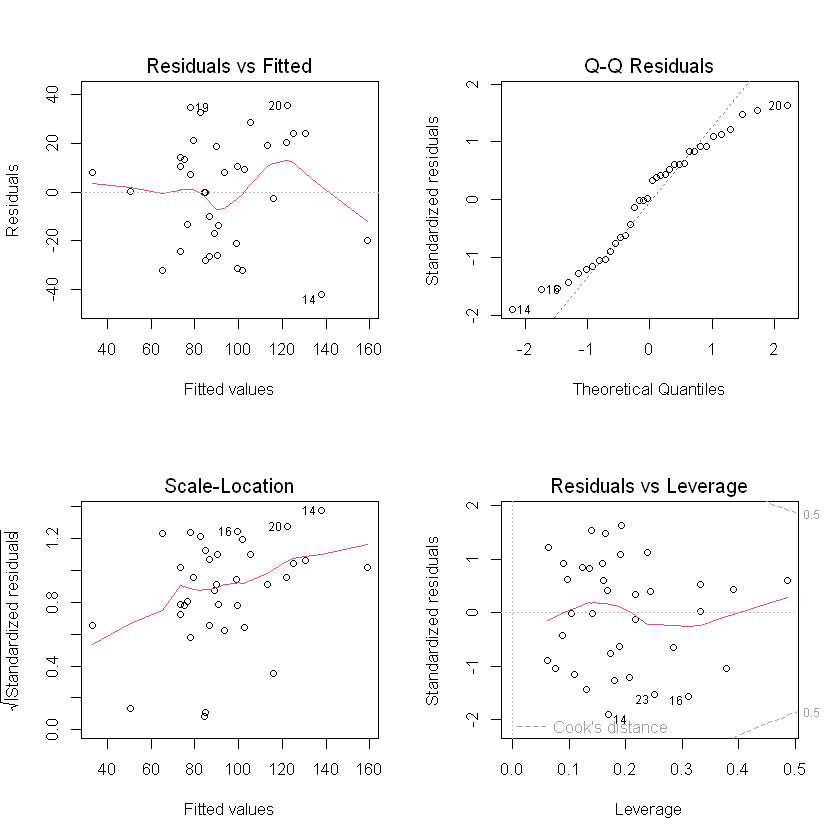

In [45]:
par(mfrow = c(2, 2)) 
plot(multiple_outlier_2022)

Overall, we can say that while there is a direct and strong relationship between COVID-19 deaths and excess deaths, this relationship is influenced by other factors. COVID-19 deaths are a significant but not exclusive predictor of excess deaths. The additional variables considered in the multiple regression model also contribute to the excess death rate, indicating that the link between COVID-19 and excess deaths is both direct and indirect. The impact of COVID-19 on excess deaths is multifaceted and can be affected by broader socioeconomic and health-related factors.







COVID-19 Deaths per 100k: With a coefficient of 0.9776, this predictor remains significant, meaning that for each increase in COVID-19 death per 100k, there is nearly a corresponding increase in excess deaths per 100k. The relationship is strong, as evidenced by its low p-value (0.000204).

GDP per Capita: The positive coefficient (0.0003915) and its p-value (0.049557) suggest a marginal significance, indicating that higher GDP per capita may correspond to a slight increase in excess deaths per 100k for this year, which is counterintuitive and may warrant further investigation.

Population Density: This has a positive coefficient (0.0786) and is statistically significant (p-value = 0.034442), suggesting that higher population density might be associated with an increase in excess deaths per 100k.

Age 65 Over Percentage and Access to Quality Healthcare: While these coefficients are negative, suggesting a potential decrease in excess deaths per 100k with higher values, they are not statistically significant at the 5% level.

Overall, the model accounts for approximately 54.96% of the variance in excess deaths per 100k (Multiple R-squared = 0.5496), which is a moderate fit. The F-statistic is significant (p-value = 0.0004075), indicating that the model is reliable in explaining excess deaths per 100k for the data and factors considered.



#
#

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

***2020:***

A strong positive correlation exists between COVID-19 deaths and excess deaths, with the relationship being statistically significant.
The simple linear regression indicates a substantial association, where each COVID-19 death per 100k predicts an increase of approximately 1.3 excess deaths per 100k.
The multiple regression model shows a significant impact of COVID-19 deaths on excess deaths, and the model accounts for about 75.76% of the variance in excess deaths. Other factors like GDP per capita and healthcare access are considered but are not as significant.

***2021:***

The correlation between COVID-19 deaths and excess deaths strengthens, with a correlation coefficient of 0.8919, indicating an even stronger positive relationship.
Each additional COVID-19 death per 100k is associated with an increase of approximately 1.3439 excess deaths per 100k, as per the simple regression model.
The multiple regression model continues to highlight the significance of COVID-19 deaths as a predictor and shows an improved explanatory power, with an R-squared value of 0.8407. Access to quality healthcare shows a trend toward significance in potentially reducing excess deaths.

***2022:***

The correlation between COVID-19 deaths and excess deaths remains positive but is weaker compared to 2021, with a correlation coefficient of 0.6430.
The simple linear regression model suggests that the impact of COVID-19 deaths on excess deaths is less pronounced than in the previous years, with a lower predictive increase of 0.8480 excess deaths per 100k.
The multiple regression model's R-squared value indicates a moderate fit, explaining about 54.96% of the variance in excess deaths. Population density emerges as a significant factor, and GDP per capita shows a marginal positive association with excess deaths.

***Overall Key Findings:***

There is a consistent positive correlation between COVID-19 deaths and excess deaths across all three years, with the strength of the relationship varying annually.
COVID-19 deaths per 100k are a significant predictor of excess deaths per 100k each year, with the influence being most pronounced in 2021.
The multiple regression models reveal that other factors such as GDP per capita, population density, and healthcare access have varying levels of impact on excess deaths, but none are as consistently significant as COVID-19 deaths.
The variability in the correlation strength and model fit across years suggests that while COVID-19 is a crucial factor, other unmeasured factors may also play a role in influencing excess deaths.

**Conclusion**

The analysis of data from 2020 to 2022 shows that excess deaths are linked to COVID-19 deaths, both directly and indirectly. Statistically significant positive correlations and regression coefficients across these years indicate that increases in COVID-19 deaths per 100k are associated with increases in excess deaths per 100k. While the strength of this relationship varies by year, the consistency of the findings underscores COVID-19's impact on mortality. Furthermore, the presence of other contributing factors in the multiple regression models implies that the relationship between COVID-19 deaths and excess deaths is also influenced by wider health and demographic variables.